## Observations and Insights 

In [203]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = study_results.merge(mouse_metadata, on = "Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [116]:
#Dropping duplicate rows

#Find duplicate rows indicated by boolean series
dups_bool = combined_data.duplicated(subset=['Mouse ID','Timepoint'])

#Add duplicate boolean series to data frame 
bool_combined_data = combined_data
bool_combined_data["Duplicates"]= dups_bool

#Iterate through 'Duplicates' and find Mouse ID duplicates
dup_mouse_id_index = []

for index in range(0,len(bool_combined_data)):
    if bool_combined_data.loc[index]["Duplicates"] == True:
        dup_mouse_id_index.append(bool_combined_data.loc[index]["Mouse ID"])
    else:
        next

#Get rid of duplicate mice IDs
bad_mice = list(set(dup_mouse_id_index))

#Iterate through data and drop the bad mice found (only one mouse in this case)
clean_data = bool_combined_data
clean_data = clean_data.rename({'Mouse ID' : 'Mouse_ID'}, axis = 1)

for bad_mouse in bad_mice:
    clean_data = clean_data[clean_data.Mouse_ID != bad_mouse]

clean_data = clean_data.drop(columns = "Duplicates")
clean_data


,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [117]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data)
num_mice

1880

## Summary Statistics

In [118]:
# Create Summary Data Frame


#Condense data frame to two columns we are intested in (Drug Regimen and Tumor Volume)
codensed_df = clean_data.loc[:,['Drug Regimen','Tumor Volume (mm3)']]

#Calculate mean, median, standard deviation, and standard error for each drug
summary_df = codensed_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [np.mean, np.median,np.std, st.sem]})

#Format to 2 decimal places
for header in summary_df:
    summary_df[header]=summary_df[header].apply('{:.2f}'.format)

#Rename df headers   
summary_df = summary_df.rename({'mean':'Mean','median':'Median','std':'Standard_Dev','sem':'Standard_Err'}, axis = 1)
summary_df


Tumor Volume (mm3)                                 
                           Mean Median Standard_Dev Standard_Err
Drug Regimen                                                    
Capomulin                 40.68  41.56         4.99         0.33
Ceftamin                  52.59  51.78         6.27         0.47
Infubinol                 52.88  51.82         6.57         0.49
Ketapril                  55.24  53.70         8.28         0.60
Naftisol                  54.33  52.51         8.13         0.60
Placebo                   54.03  52.29         7.82         0.58
Propriva                  52.32  50.45         6.62         0.54
Ramicane                  40.22  40.67         4.85         0.32
Stelasyn                  54.23  52.43         7.71         0.57
Zoniferol                 53.24  51.82         6.97         0.52

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [9]:
#Create series of total measurements for each drug 

#Create series of total measurments of each drug
total_meas_series = clean_data['Drug Regimen'].value_counts()

#Identify list of drugs in study and how many measurements as x and y values respectively for bar plot
x_drug_regimen_list = total_meas_series.index.values.tolist()
y_drug_meas_list = total_meas_series.values.tolist()


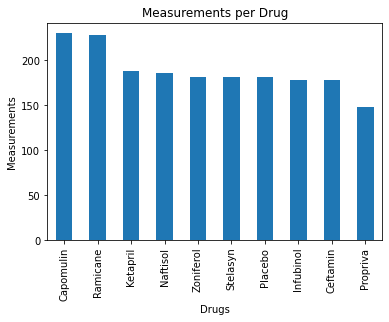

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using DataFrame.plot.

#Make bar plot with title
drug_meas_graph = total_meas_series.plot(kind = 'bar',title = "Measurements per Drug")

#Change x and y labels
drug_meas_graph.set_xlabel("Drugs")
drug_meas_graph = drug_meas_graph.set_ylabel("Measurements")


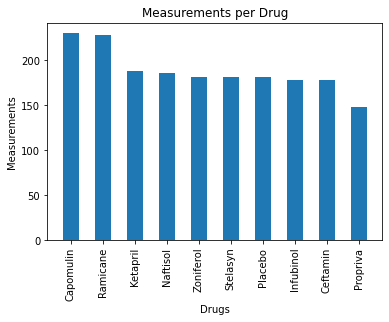

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Make the bar plot with title and identical width
drug_meas_graph2 = plt.bar(x_drug_regimen_list,y_drug_meas_list,width=.5)

#Rotate the x values 
drug_meas_graph2 = plt.xticks(x_drug_regimen_list,rotation = 'vertical')

#Change x and y labels
drug_meas_graph2 = plt.xlabel('Drugs')
drug_meas_graph2 = plt.ylabel('Measurements')
drug_meas_graph2 = plt.title("Measurements per Drug")

In [13]:
# Determine x and y values for pie chart for female vs male mice

#Count male vs female mice occurrences
mouse_sex_series = clean_data['Sex'].value_counts()

#Separate index and values as x and y variables for pie chart
label_gender_list = mouse_sex_series.index.values.tolist()
gender_count = mouse_sex_series.values.tolist()



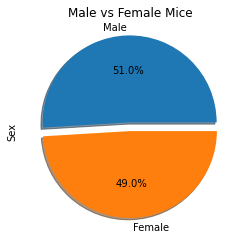

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (.1,0)
mouse_sex_graph = mouse_sex_series.plot(kind="pie",
                                        autopct = '%1.1f%%',
                                        explode = explode,
                                        shadow = True,
                                        title ="Male vs Female Mice")


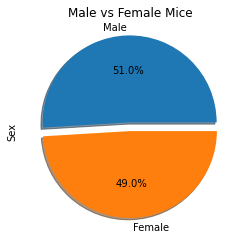

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex_graph2 = plt.pie(gender_count,explode=explode,labels = label_gender_list,autopct="%1.1f%%",shadow=True)
mouse_sex_graph2 = plt.ylabel('Sex')
mouse_sex_graph2 = plt.title("Male vs Female Mice")

## Quartiles, Outliers and Boxplots

In [243]:
#Find greatest value of Timepoint for each mouse
max_timepoint = clean_data.groupby("Mouse_ID").max()
max_timepoint = max_timepoint.loc[:,"Timepoint"]

#Create list 
max_timepoint_indices = max_timepoint.index.values

#Iterate through clean data and find Tumor Volume where Mouse ID and greatest Timepoint match
#Results come out to index in clean data we want
max_tumor_index = []
for index in range(0,len(max_timepoint)):   
    index_new = clean_data.loc[(clean_data["Mouse_ID"] == max_timepoint_indices[index]) & (
        clean_data["Timepoint"] == max_timepoint[index]),:].index.values
    max_tumor_index.append(index_new[0])
    
#Pull wanted indices from clean data
mouse_tumor_df = clean_data.loc[max_tumor_index,['Mouse_ID','Timepoint', 'Tumor Volume (mm3)']]

#Merge new table with study results to add drug used and clean up table
mouse_tumor_df = mouse_tumor_df.merge(mouse_metadata,left_on="Mouse_ID",right_on="Mouse ID")
mouse_tumor_df = mouse_tumor_df.set_index('Drug Regimen')
mouse_tumor_df = mouse_tumor_df.drop(columns=['Mouse ID','Sex','Age_months','Weight (g)'])
mouse_tumor_df.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Infubinol,a203,45,67.973419
Infubinol,a251,45,65.525743
Placebo,a262,45,70.717621
Ceftamin,a275,45,62.999356
Stelasyn,a366,30,63.440686


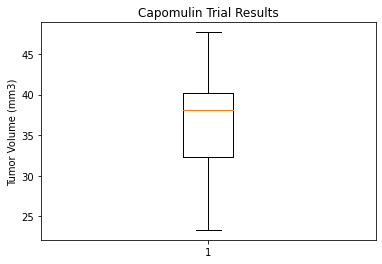

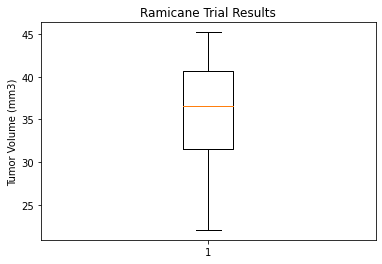

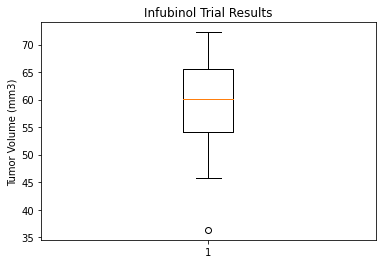

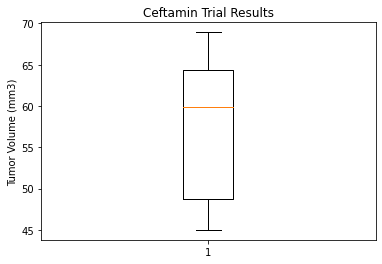

In [198]:
#Create series for each of the four drugs
Capomulin_list= mouse_tumor_df.loc['Capomulin','Tumor Volume (mm3)']
Ramicane_list= mouse_tumor_df.loc['Ramicane','Tumor Volume (mm3)']
Infubinol_list= mouse_tumor_df.loc['Infubinol','Tumor Volume (mm3)']
Ceftamin_list= mouse_tumor_df.loc['Ceftamin','Tumor Volume (mm3)']

#Create list of 4 drugs
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']

#Create empty lists of variables we want to calculate. Will be appended to in 'for' loop
lowerq_list = []
upperq_list = []
iqr_list = []
lower_bound_list = []
upper_bound_list = []
outlier_list = []

#Calculate desired variables
for drug in drugs:
    
    #Calculate lower and upper quartiles
    quartiles = globals()[f'{drug}_list'].quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    lowerq_list.append(lowerq)
    
    upperq = quartiles[0.75]
    upperq_list.append(upperq)
    
    #Calculate IQR
    iqr = upperq-lowerq
    iqr_list.append(iqr)
    
    #Calculate lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    lower_bound_list.append(lower_bound)
    
    upper_bound = upperq + (1.5*iqr)
    upper_bound_list.append(upper_bound)
    
    #Iterate through tumor volume values and compare to upper and lower bounds. Place anomalies into an outlier list
    outliers = []
    for tumor_vol in globals()[f'{drug}_list']:
        if tumor_vol < lower_bound:
            outliers.append(tumor_vol)
        elif tumor_vol > upper_bound:
            outliers.append(tumor_vol)
        else:
            next
    
    #Append outliers found for drug into the final outlier list
    outlier_list.append(outliers)

    #Produce Box Plot for each drug
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'{drug} Trial Results')
    ax1.set_ylabel('Tumor Volume (mm3)')
    ax1.boxplot(globals()[f'{drug}_list'])
    plt.show()

## Line and Scatter Plots

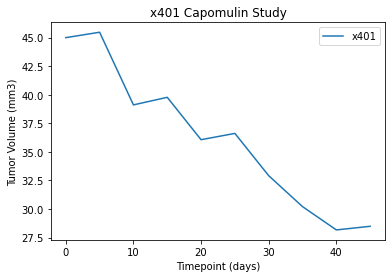

In [164]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Create dataframe for Capomulin drug
capomulin_df = clean_data.loc[(clean_data['Drug Regimen']=='Capomulin'),:]

#Randomly generate index of a mouse we want to chart
mouse_index = random.randint(0,len(capomulin_df))

#Pull Mouse_ID of a Capomulin mouse
mouse = capomulin_df.iloc[mouse_index,0]

#Get tumor volume and time points of mouse
capomulin_df = capomulin_df.set_index('Mouse_ID')
tumor_vol = capomulin_df.loc[mouse,"Tumor Volume (mm3)"].tolist()
time_points = capomulin_df.loc[mouse,"Timepoint"].tolist()

#Create line plot
mouse_plot, = plt.plot(time_points, tumor_vol, label = mouse)
plt.title(f'{mouse} Capomulin Study')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles = [mouse_plot],loc='best')
plt.show()

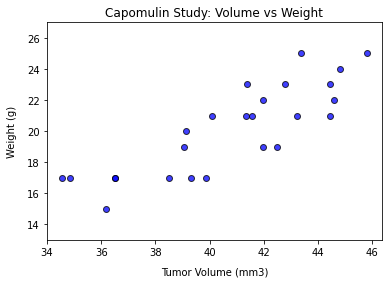

In [230]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Determine average tumor volume by using groupby function
capomulin_avg = capomulin_df.groupby('Mouse_ID').mean()

avg_tumor_list = capomulin_avg.loc[:,'Tumor Volume (mm3)']
weight_list = capomulin_avg.loc[:,'Weight (g)']

plt.scatter(avg_tumor_list, weight_list, marker="o", facecolors="blue", edgecolors="black", alpha=.75)
plt.title("Capomulin Study: Volume vs Weight")
plt.xlabel('Tumor Volume (mm3)',labelpad=10)
plt.ylabel('Weight (g)',labelpad=10)
plt.ylim(min(weight_list)-2,max(weight_list)+2)
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


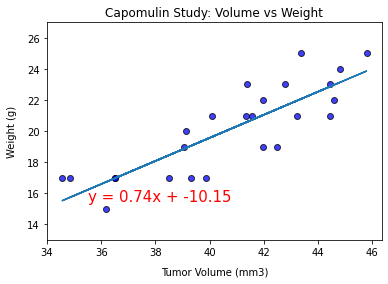

In [241]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen




correlation = st.pearsonr(avg_tumor_list,weight_list)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#Determine slope and intercept of regression line
(slope, intercept, rvalue, pvalue, stderr) =  linregress(avg_tumor_list, weight_list)

#Calculate y values of the regression line (x values are the weight)
regress_values = slope* avg_tumor_list + intercept #y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the original scatter plot
plt.scatter(avg_tumor_list, weight_list, marker="o", facecolors="blue", edgecolors="black", alpha=.75)
plt.title("Capomulin Study: Volume vs Weight")
plt.xlabel('Tumor Volume (mm3)',labelpad=10)
plt.ylabel('Weight (g)',labelpad=10)
plt.ylim(min(weight_list)-2,max(weight_list)+2)


#Plot the regressions line
plt.plot(avg_tumor_list,regress_values)
plt.annotate(line_eq,(35.5,15.5),fontsize=15,color="red")
plt.show()